In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/loan_prediction.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
for i in df:
    un=df[i].unique().size
    print(i,un)

Loan_ID 614
Gender 3
Married 3
Dependents 5
Education 2
Self_Employed 3
ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 204
Loan_Amount_Term 11
Credit_History 3
Property_Area 3
Loan_Status 2


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Treating Null values & MODIFICATION OF DATA SET

In [8]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
## AS female count is lower than male to minimise biasness we filling null value with 'Female'
df['Gender']=df['Gender'].fillna('Female')
## AS No count is lower than Yes to minimise biasness we filling null value of Married column with 'No'
df['Married']=df['Married'].fillna('No')
## Dependant column with Mode value
df['Dependents']=df['Dependents'].fillna(('0'))
## AS 'Yes' count is lower than No to minimise biasness we filling null value of Self_employed column with 'Yes'
df['Self_Employed']=df['Self_Employed'].fillna('Yes')
## Updating Credit History with 0 to avoid biasness
df['Credit_History']=df['Credit_History'].fillna(0)



In [14]:
df['ApplicantIncome']=df['ApplicantIncome'].astype(float)

In [15]:
for i in df:
    if df[i].dtypes=='float64':
        if df[i].isnull().sum() > 0:
            df[i]=df[i].fillna(np.mean(df[i]))
        else:pass
    else:pass        
    

In [16]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
## Loan ID is a column with uniqu value, we can exclude it from our analysis process
Loan_data=df.drop(columns='Loan_ID')

## GRAPHICAL PLOT , NUMARIC ANALYSIS, DISCTRIBUTION OF DATA ANALYSIS, RELETIONSHIP BETWEEN COLUMN ANALYSIS

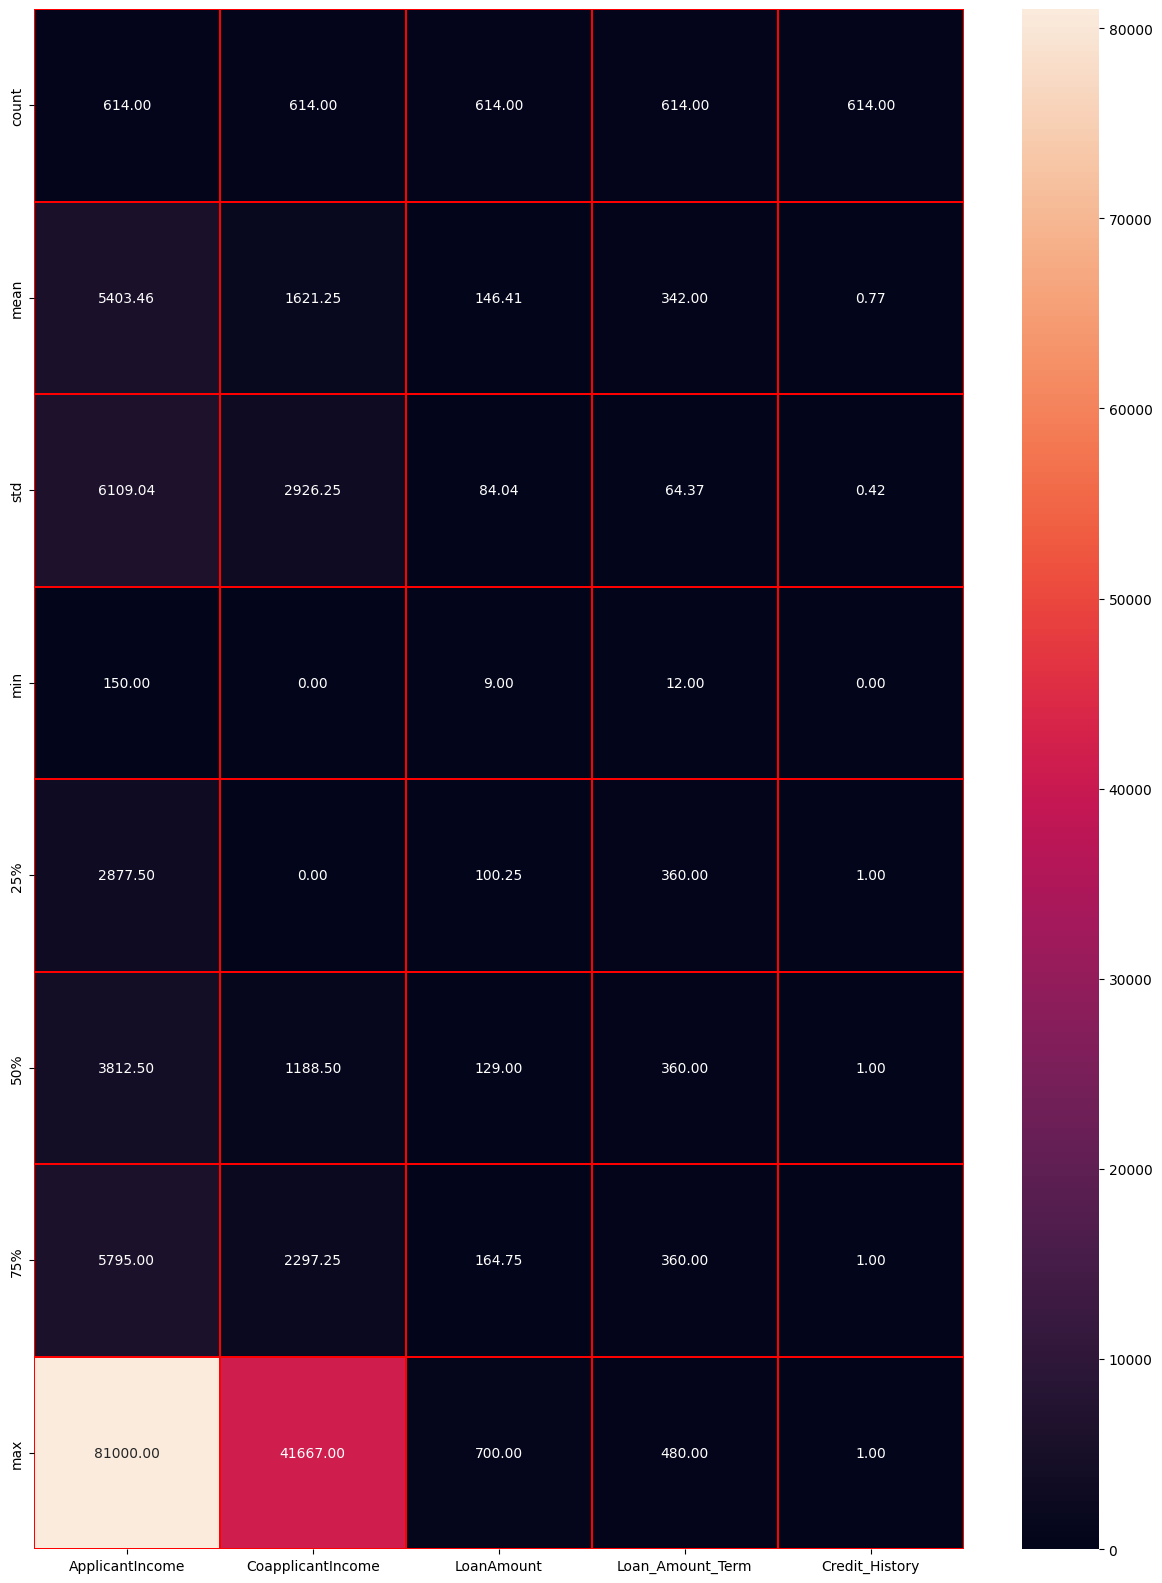

In [18]:
data=Loan_data.describe()
plt.figure(figsize=(15,20))
sns.heatmap(data,fmt='0.2f',annot=True,linewidths=0.2,linecolor='red')
plt.show()

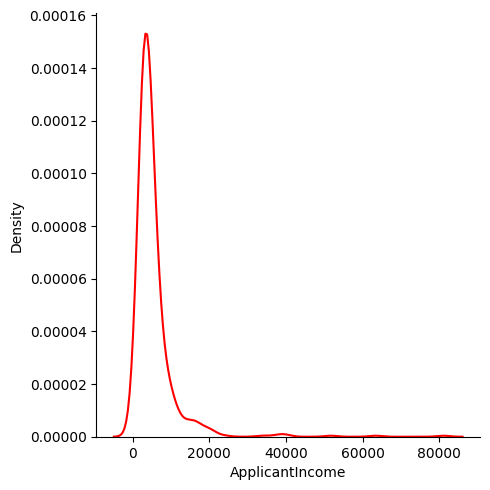

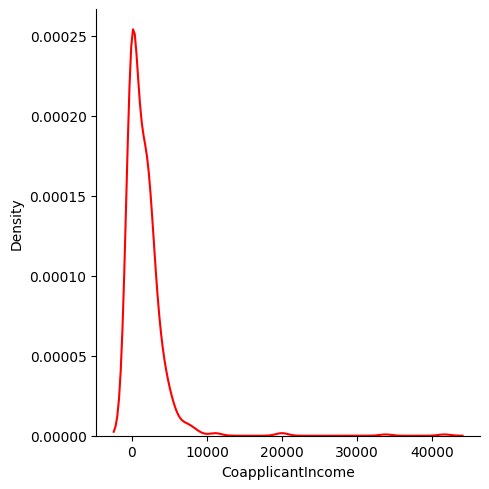

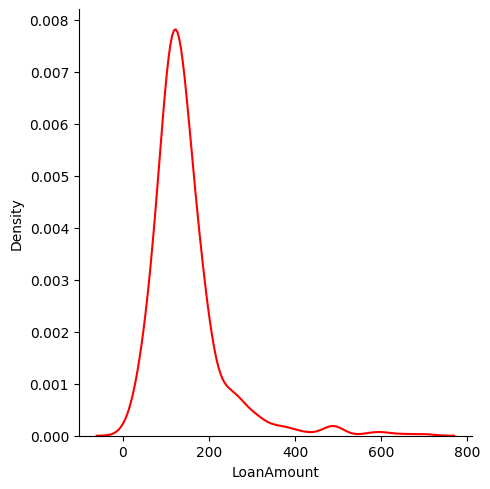

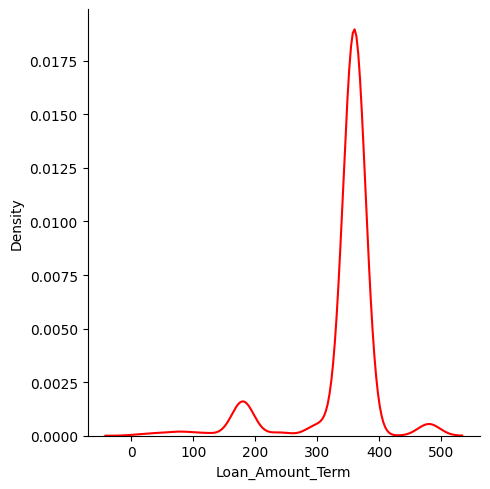

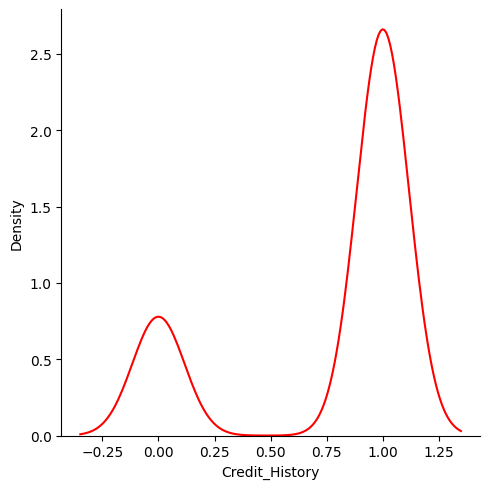

In [19]:
for i in Loan_data:
    if  Loan_data[i].dtype==float:
        sns.displot(Loan_data[i],kind='kde',color='red')
        plt.xlabel(i)
        plt.show()
    else: pass

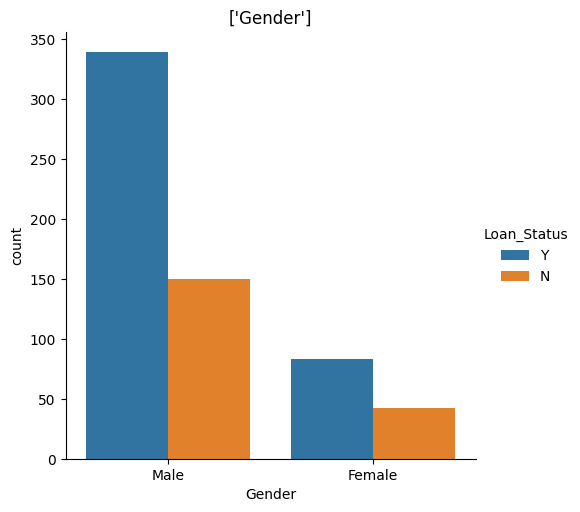

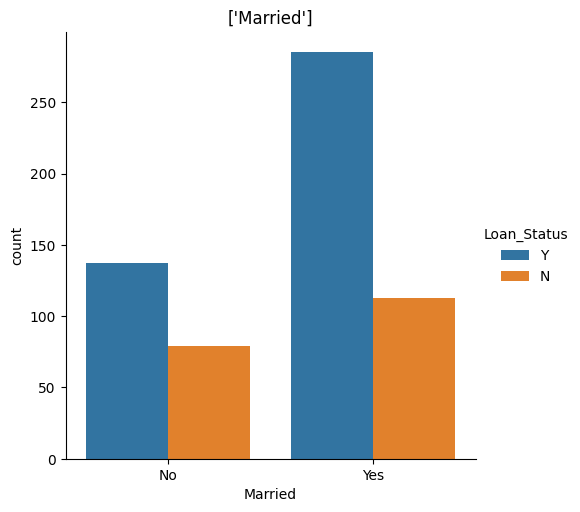

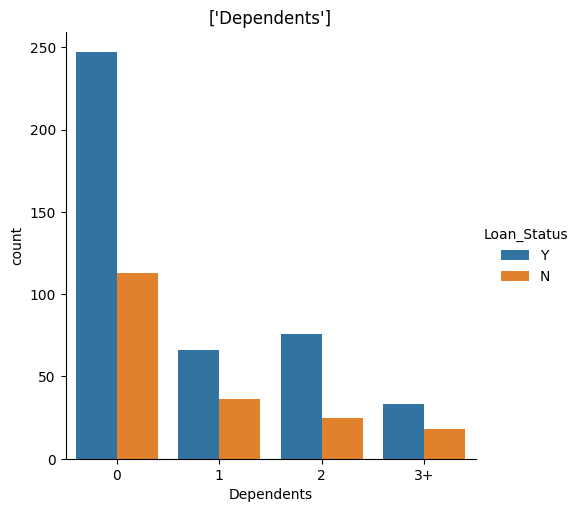

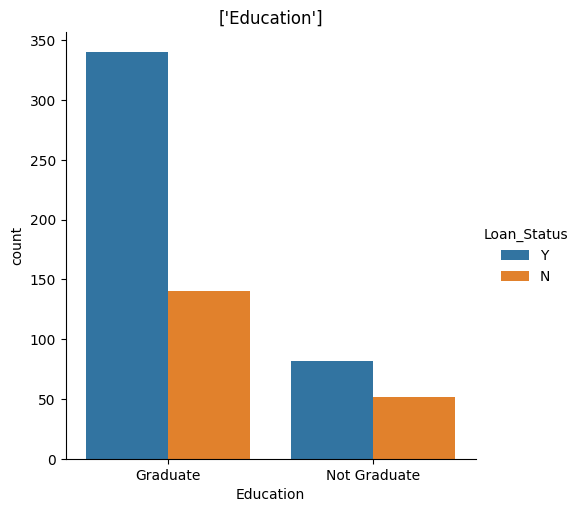

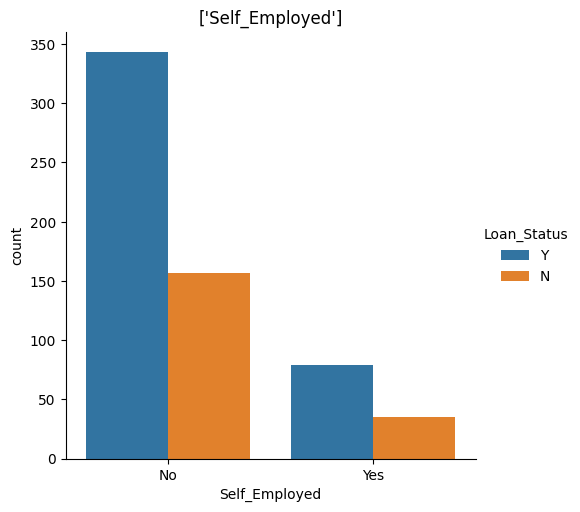

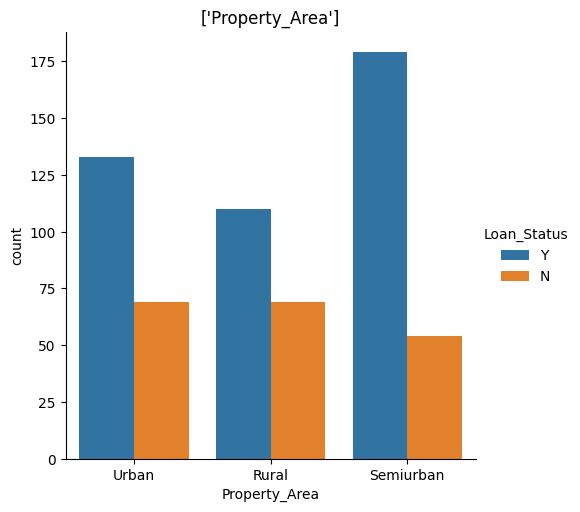

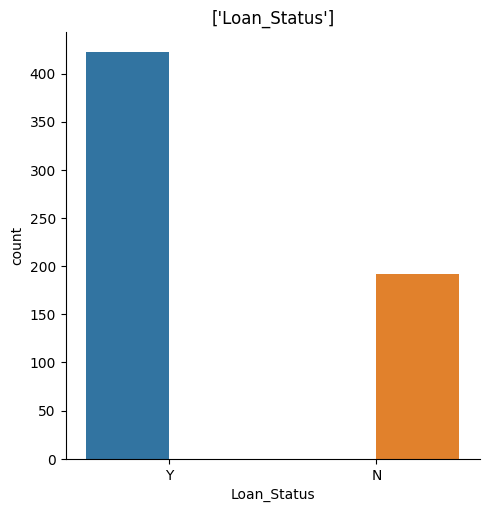

In [20]:
for i in Loan_data:
    if Loan_data[i].dtypes==object:
        sns.catplot(Loan_data,x=i,hue='Loan_Status',kind='count')
        plt.title ([i])
        plt.show()
    else:pass

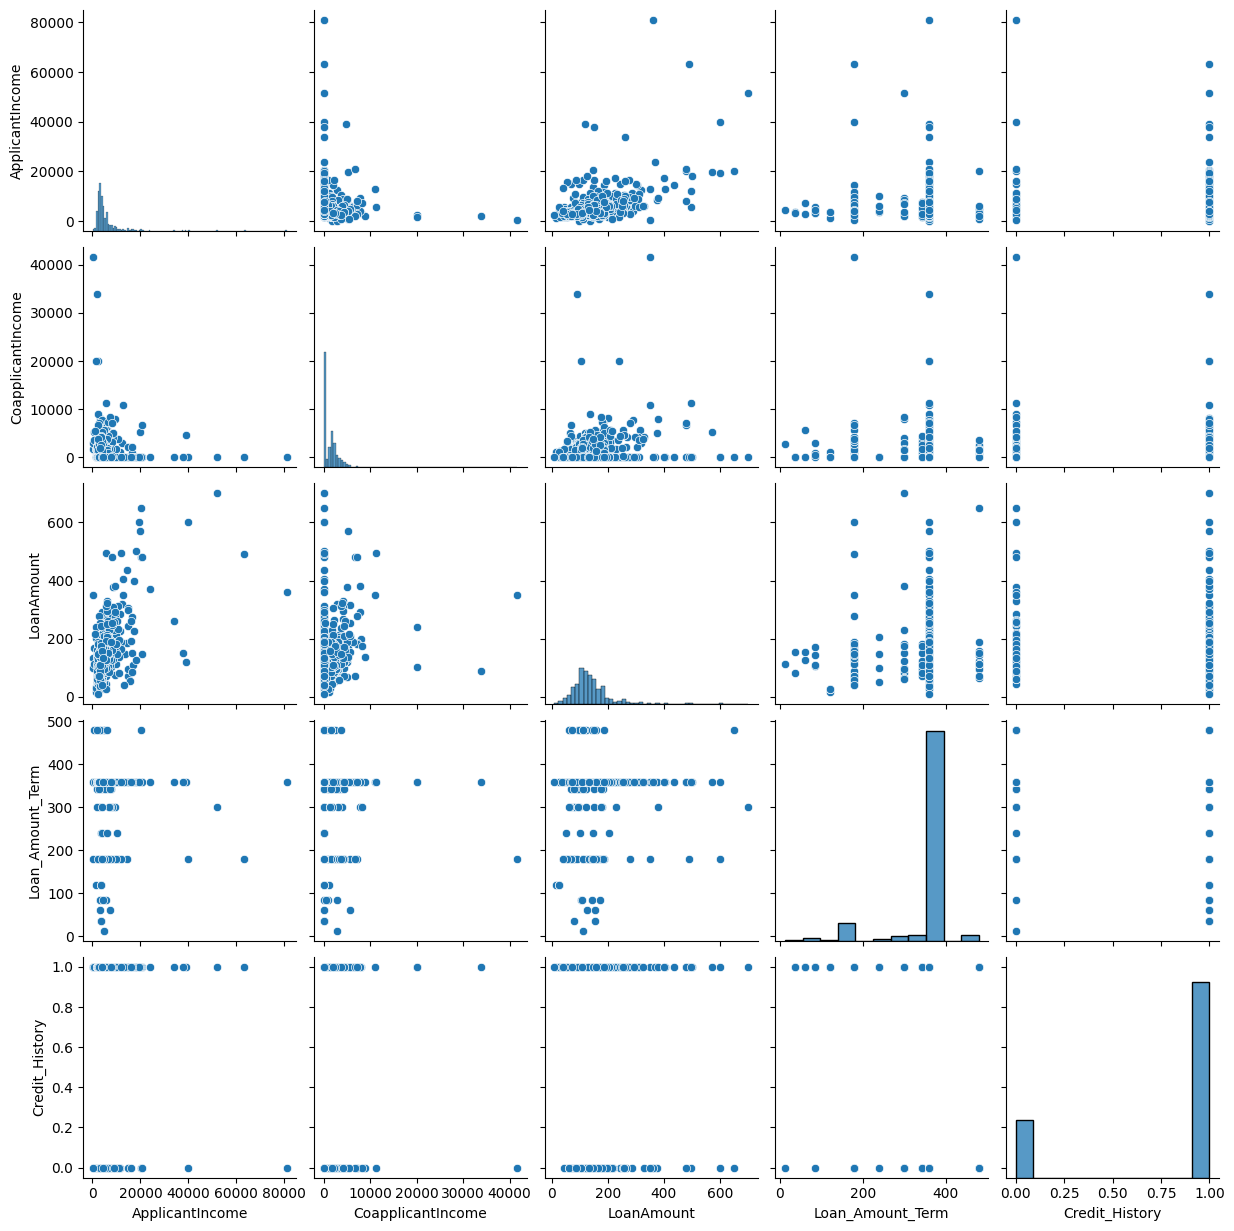

In [21]:
sns.pairplot(Loan_data)
plt.show()

In [22]:
oe=OrdinalEncoder()
for column in Loan_data:
    if Loan_data[column].dtype==object:
        oe=OrdinalEncoder()
        Loan_data[column]=oe.fit_transform(Loan_data[column].values.reshape(-1,1))
    else:pass 
print(Loan_data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0        0.0            0.0           5849.0   
1       1.0      1.0         1.0        0.0            0.0           4583.0   
2       1.0      1.0         0.0        0.0            1.0           3000.0   
3       1.0      1.0         0.0        1.0            0.0           2583.0   
4       1.0      0.0         0.0        0.0            0.0           6000.0   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0        0.0            0.0           2900.0   
610     1.0      1.0         3.0        0.0            0.0           4106.0   
611     1.0      1.0         1.0        0.0            0.0           8072.0   
612     1.0      1.0         2.0        0.0            0.0           7583.0   
613     0.0      0.0         0.0        0.0            1.0           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [23]:
## REMOVING SKEWNESS
for i in Loan_data:
    sk=Loan_data[i].skew()
    if sk>=5:
        Loan_data[i]=np.cbrt(Loan_data[i])
    else:pass
print('modified skewness of "Loan_data_data" is:')
print('=======================================')
print(Loan_data.skew())

modified skewness of "Loan_data_data" is:
Gender              -1.475893
Married             -0.622252
Dependents           1.015551
Education            1.367622
Self_Employed        1.620738
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64


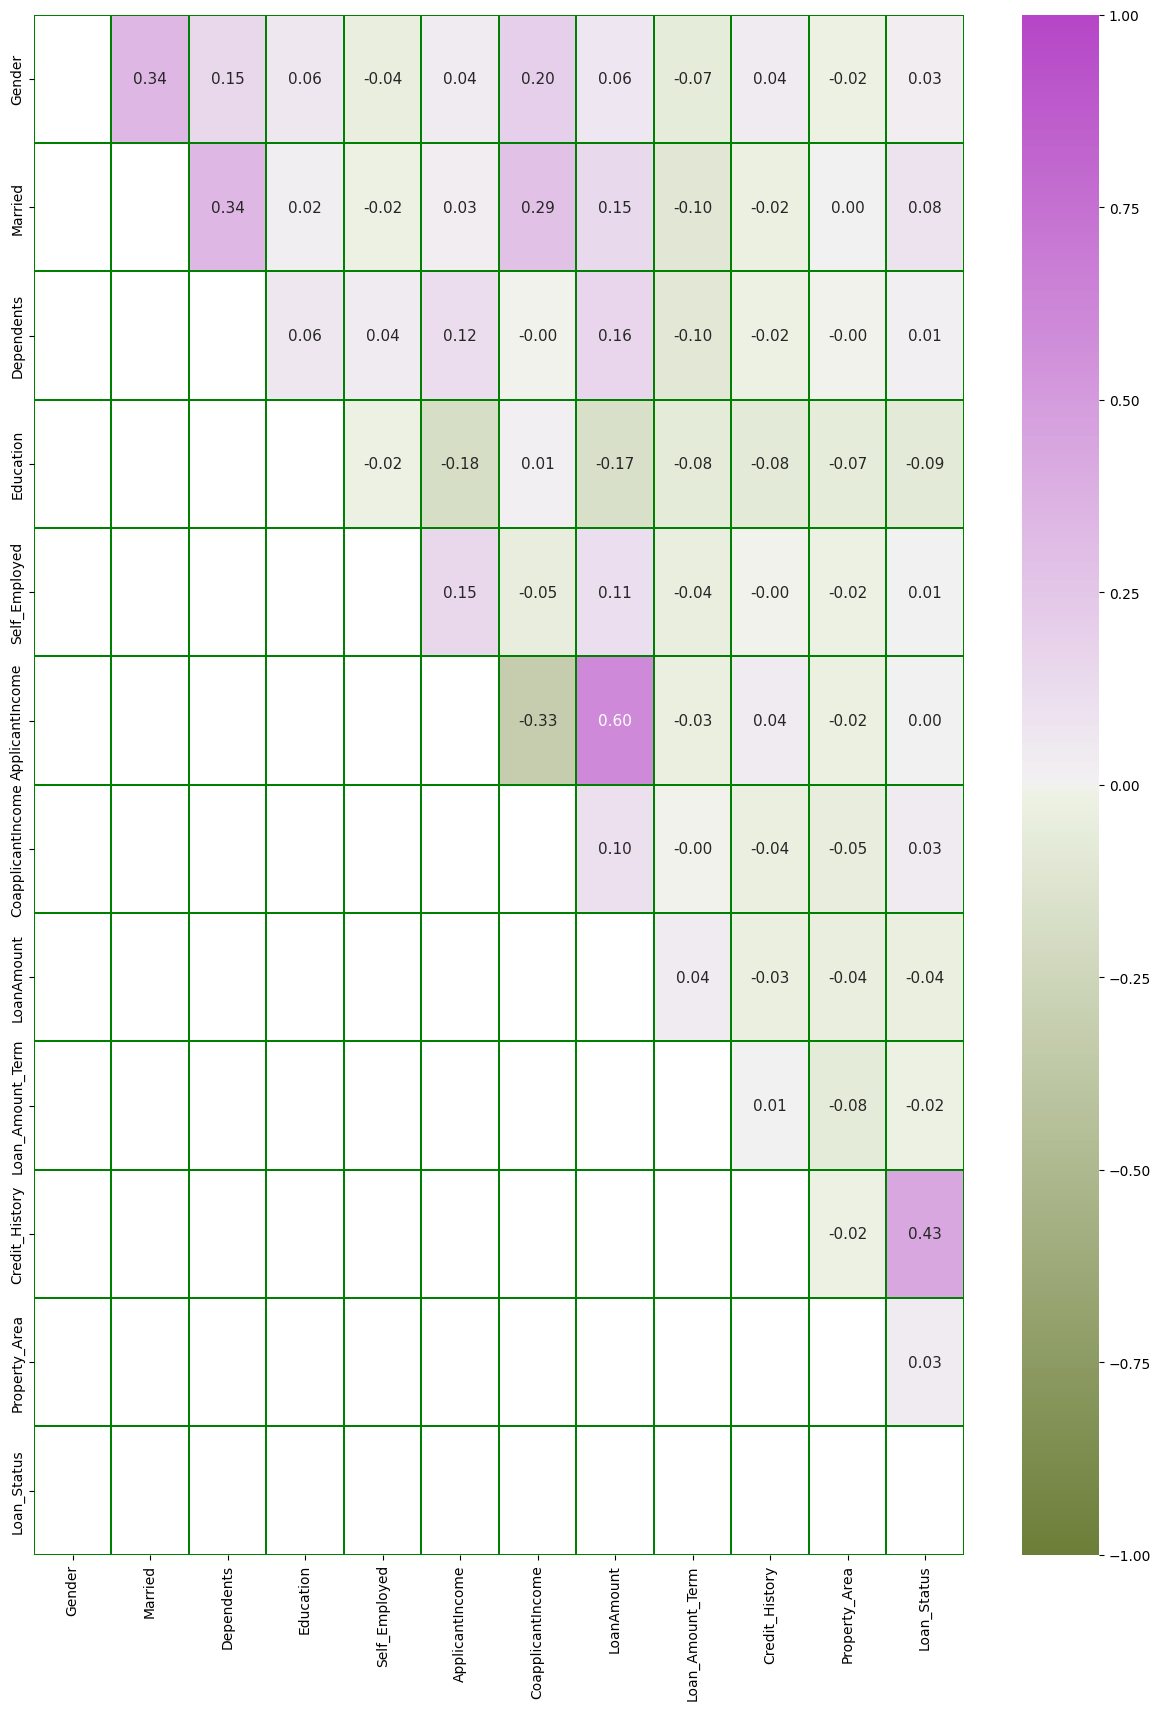

In [24]:
v=Loan_data.corr()
plt.figure(figsize=(15,20))
mask=np.zeros_like(v)
mask[np.tril_indices_from(mask)]=True
sns.heatmap(v,vmax=1,vmin=-1,annot=True,annot_kws={'fontsize':11},fmt='0.2f',linewidths=0.2,linecolor='green',mask=mask,cmap=sns.diverging_palette(100,300,as_cmap=True))
plt.show()

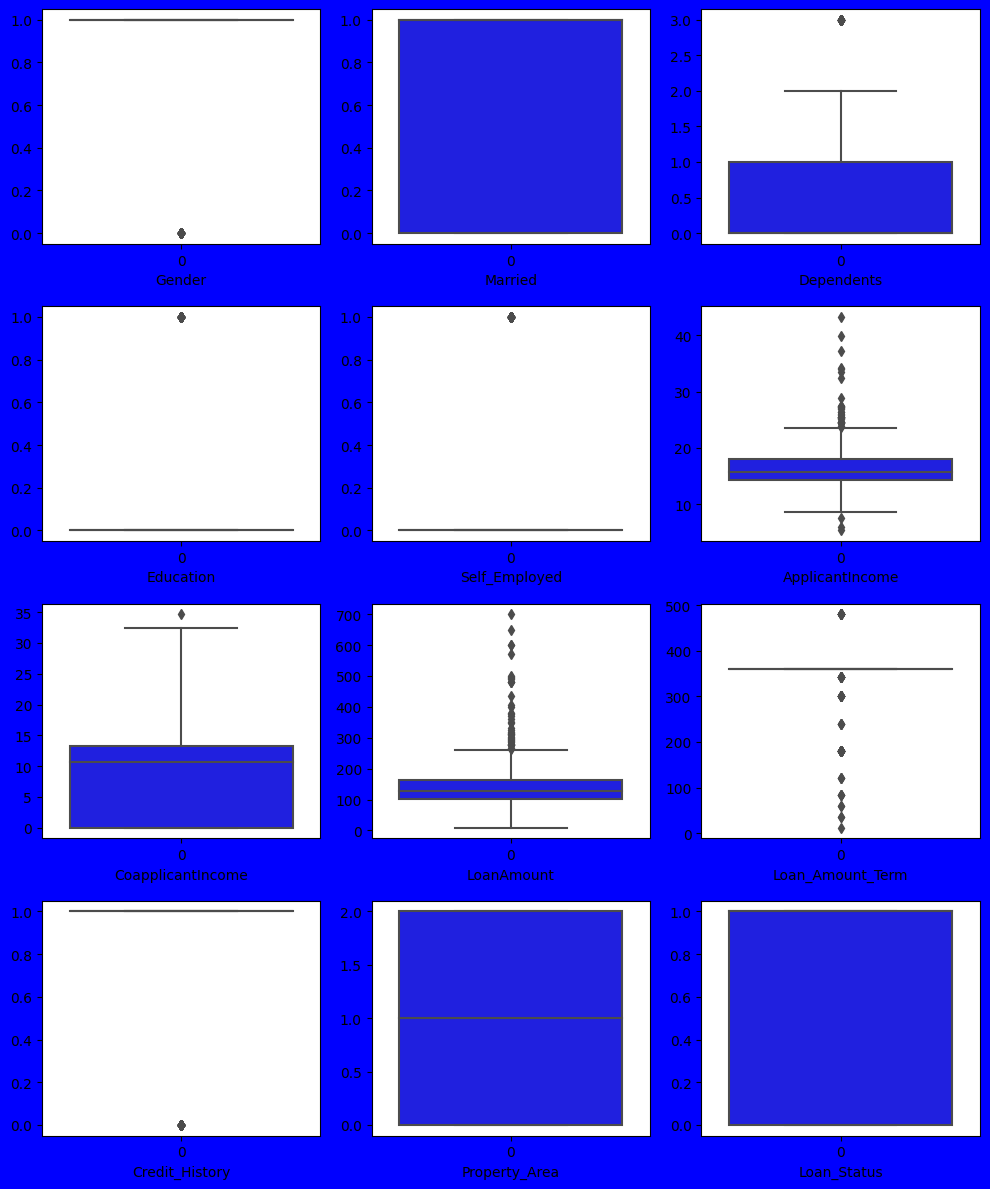

In [25]:
plt.figure(figsize=(10,12),facecolor='blue')
plotnumber=1
for column in Loan_data:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(Loan_data[column],color='blue')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

In [26]:
from scipy.stats import zscore
columns=Loan_data.columns
out_lier=Loan_data[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
Loan_data_z=Loan_data[(z<5).all(axis=1)]
print('## dataloss:')
print((Loan_data.shape[0]-Loan_data_z.shape[0])/(Loan_data.shape[0])*100)

## dataloss:
1.3029315960912053


## FEATURE AND LABEL & ML

In [27]:
x=Loan_data.drop(columns='Loan_Status')
y=Loan_data['Loan_Status']

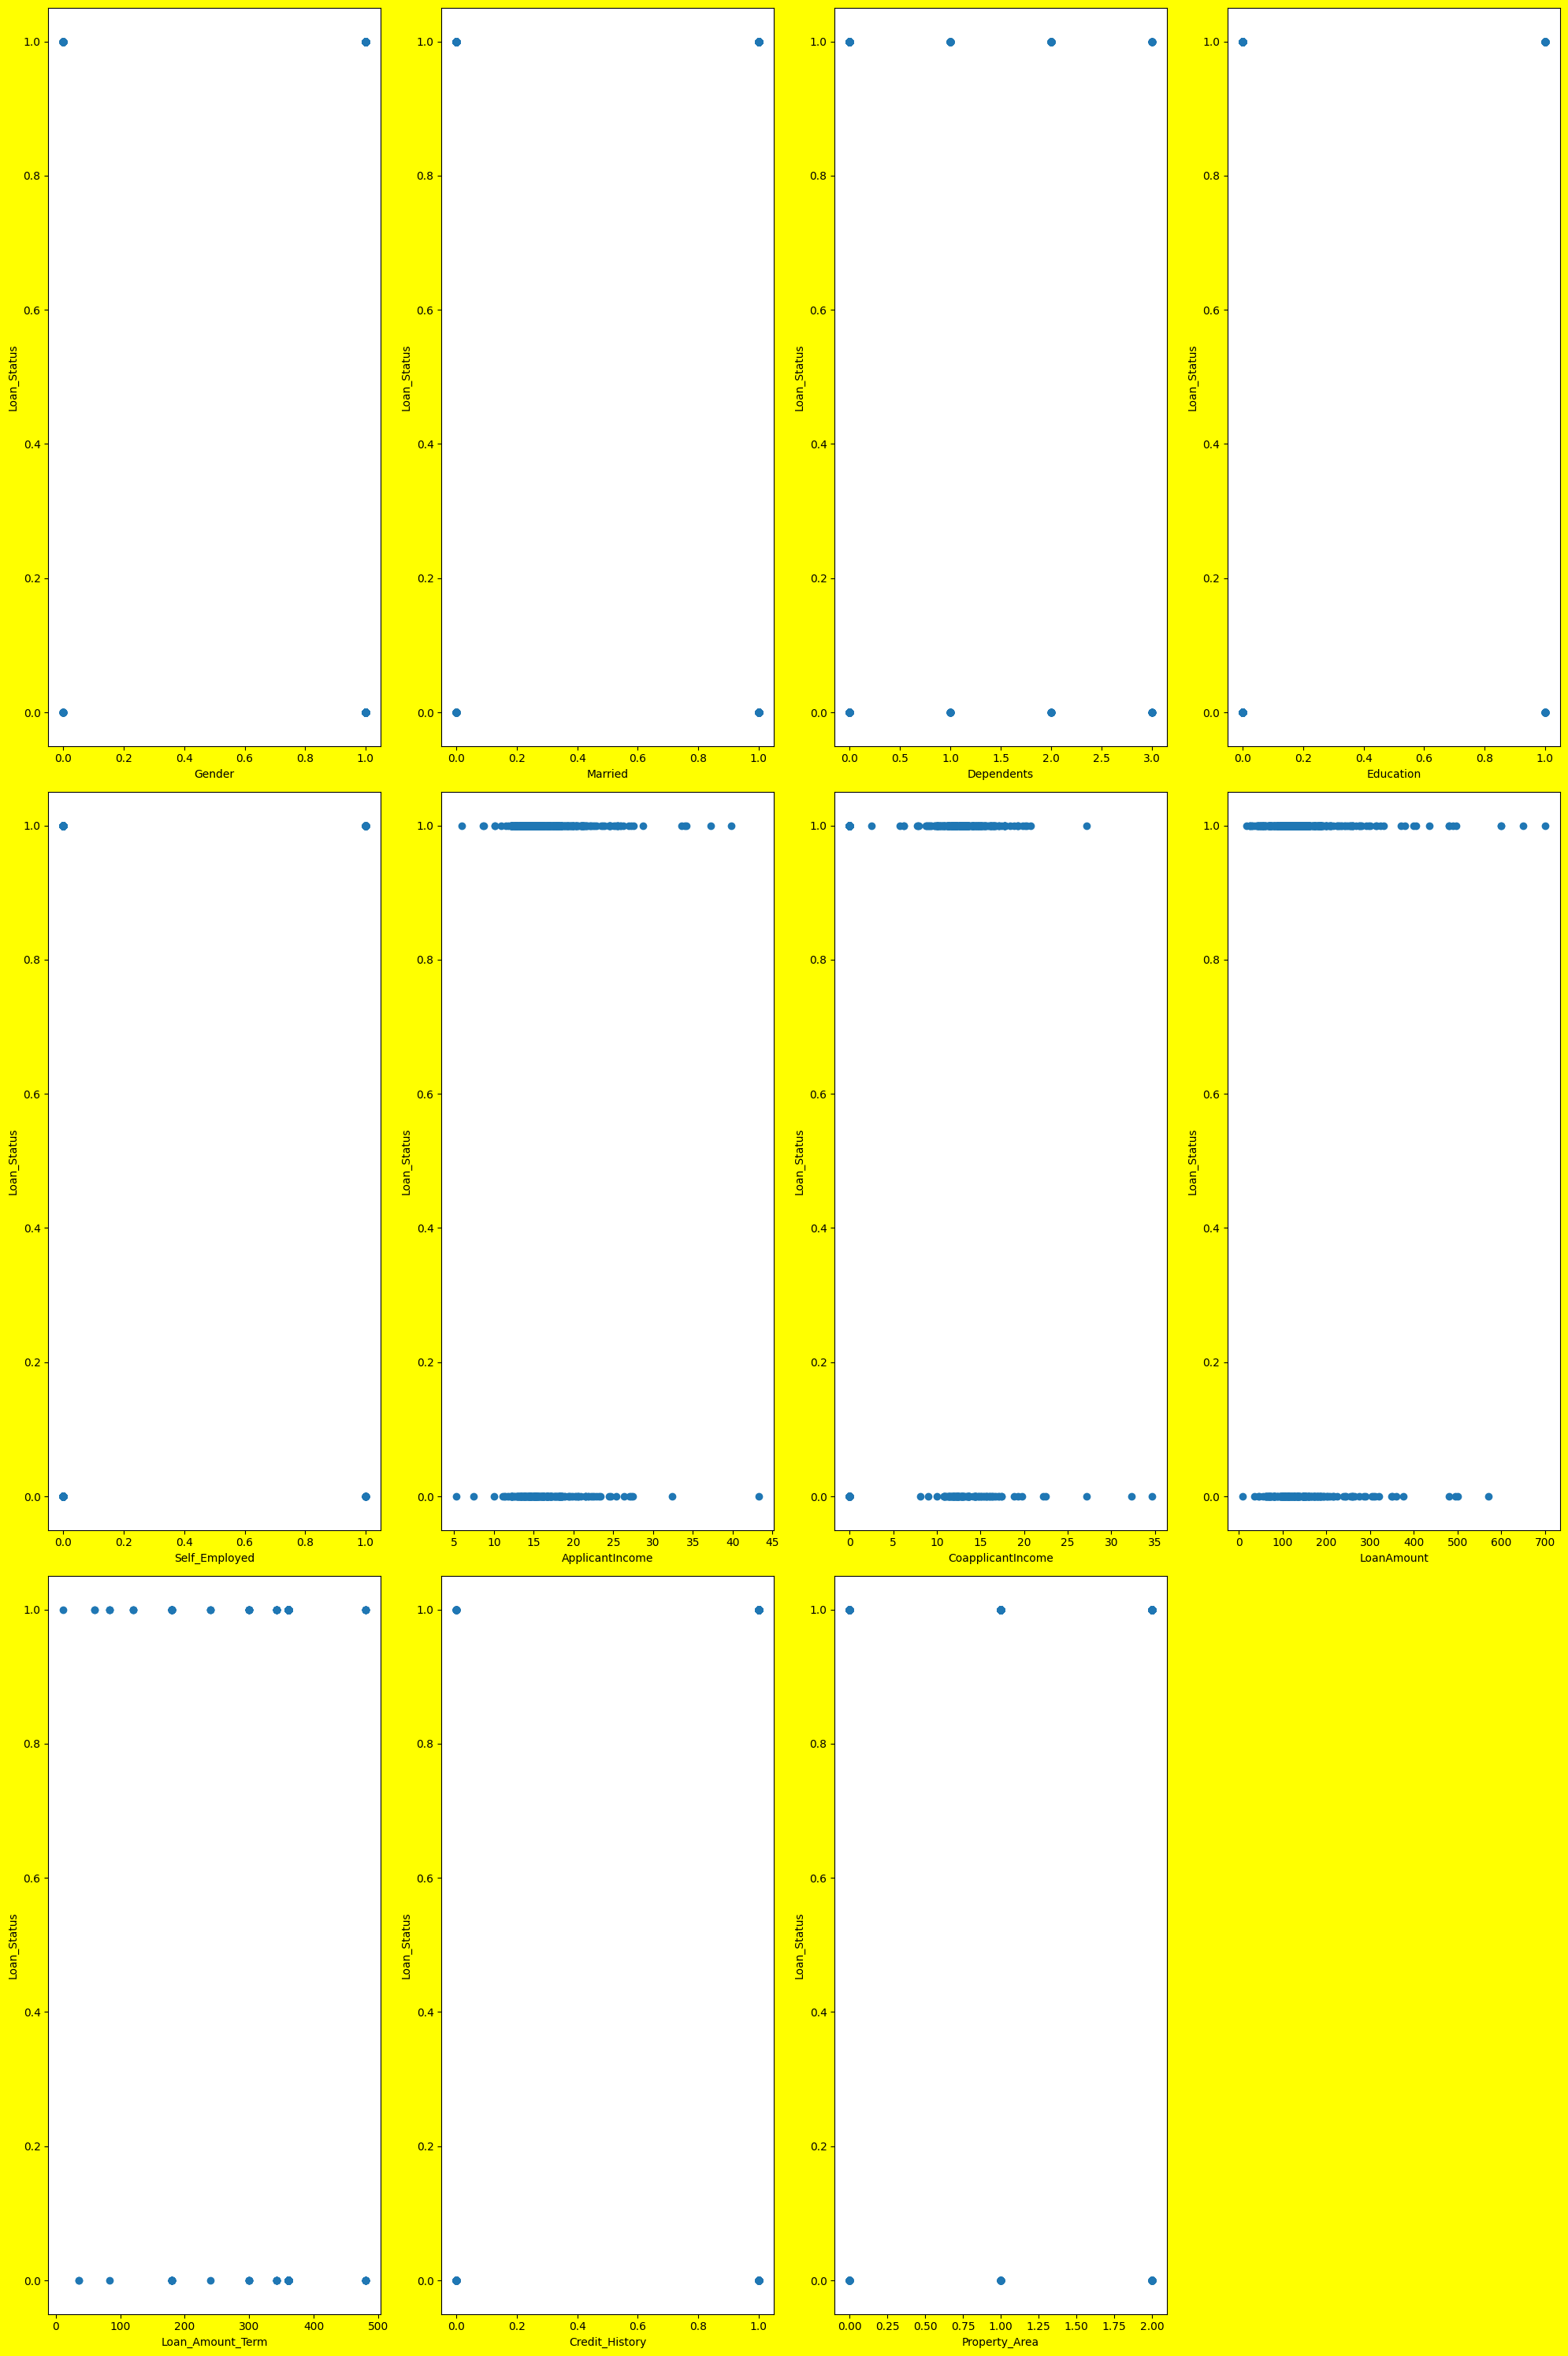

In [28]:
plt.figure(figsize=(20,30), facecolor= 'yellow')
plotnumber=1
for column in x:
    if plotnumber <=12:
        plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Loan_Status')
        plotnumber+=1
plt.tight_layout() 

In [29]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif
## Due to Small data set we are not removing any column

,vif,feature
0,5.667448,Gender
1,3.845701,Married
2,1.820502,Dependents
3,1.305554,Education
4,1.263186,Self_Employed
5,24.838373,ApplicantIncome
6,2.760734,CoapplicantIncome
7,7.133006,LoanAmount
8,15.432473,Loan_Amount_Term
9,4.312854,Credit_History


In [30]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [32]:
from imblearn.over_sampling import SMOTE
print('sample distribution before SMOTE:',y.value_counts())

sample distribution before SMOTE: 1.0    422
0.0    192
Name: Loan_Status, dtype: int64


In [33]:
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)
print('**************************************************')
print('sample distribution after SMOTE:',y1.value_counts())

**************************************************
sample distribution after SMOTE: 1.0    422
0.0    422
Name: Loan_Status, dtype: int64


In [34]:
max_accuracy=0
max_rs=0
for i in range (300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    Pred_LG=LG.predict(x_test)
    acc_score=accuracy_score(y_test,Pred_LG)
    if acc_score > max_accuracy:
        max_accuracy=acc_score
        max_rs=i
print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.7874015748031497 on random state: 223


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=max_rs)

In [36]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
P_DTC=DTC.predict(x_test)
P_DTC_T=DTC.predict(x_train)
score_DTC=cross_val_score(DTC,x1,y1)
acc_dtc=accuracy_score(y_test,P_DTC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_DTC))
print('cross_val_score=',score_DTC)
print('--------------------------------------------------------------------------------------')
cv_mean_dtc=score_DTC.mean()
print('--------------------------------------------------------------------------------------')
diff_dtc_score=accuracy_score(y_test,P_DTC)-score_DTC.mean()
print('difference between accuracy and cv_score is::',diff_dtc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       119
         1.0       0.84      0.80      0.82       135

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254

cross_val_score= [0.63313609 0.6035503  0.79289941 0.78698225 0.875     ]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.07271001257978849


In [37]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
P_ETC=ETC.predict(x_test)
P_ETC_T=ETC.predict(x_train)
score_ETC=cross_val_score(ETC,x1,y1)
acc_ETC=accuracy_score(y_test,P_ETC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_ETC))
print('cross_val_score=',score_ETC)
print('--------------------------------------------------------------------------------------')
cv_mean_etc=score_ETC.mean()
print('--------------------------------------------------------------------------------------')
diff_etc_score=accuracy_score(y_test,P_ETC)-score_ETC.mean()
print('difference between accuracy and cv_score is::',diff_etc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       119
         1.0       0.85      0.83      0.84       135

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254

cross_val_score= [0.70414201 0.69230769 0.85207101 0.84615385 0.89285714]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.03320232160329073


In [38]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
P_GB=GB.predict(x_test)
P_GB_T=GB.predict(x_train)
score_GB=cross_val_score(GB,x1,y1)
acc_GB=accuracy_score(y_test,P_GB)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_GB))
print('cross_val_score=',score_GB)
print('--------------------------------------------------------------------------------------')
cv_mean_GB=score_GB.mean()
print('--------------------------------------------------------------------------------------')
diff_GB_score=accuracy_score(y_test,P_GB)-score_GB.mean()
print('difference between accuracy and cv_score is::',diff_GB_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83       119
         1.0       0.83      0.91      0.87       135

    accuracy                           0.85       254
   macro avg       0.86      0.85      0.85       254
weighted avg       0.85      0.85      0.85       254

cross_val_score= [0.69230769 0.67455621 0.85207101 0.8816568  0.89285714]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.05170392902070686


In [39]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
P_RF=RF.predict(x_test)
P_RF_T=RF.predict(x_train)
score_RF=cross_val_score(RF,x1,y1)
acc_RF=accuracy_score(y_test,P_RF)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_RF))
print('cross_val_score=',score_RF)
print('--------------------------------------------------------------------------------------')
cv_mean_RF=score_RF.mean()
print('--------------------------------------------------------------------------------------')
diff_RF_score=accuracy_score(y_test,P_RF)-score_RF.mean()
print('difference between accuracy and cv_score is::',diff_RF_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       119
         1.0       0.86      0.88      0.87       135

    accuracy                           0.86       254
   macro avg       0.86      0.86      0.86       254
weighted avg       0.86      0.86      0.86       254

cross_val_score= [0.69230769 0.69230769 0.85798817 0.8816568  0.91666667]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.05401932007019827


In [40]:
SV=SVC()
SV.fit(x_train,y_train)
P_SV=SV.predict(x_test)
P_SV_T=SV.predict(x_train)
score_SV=cross_val_score(SV,x1,y1)
acc_SV=accuracy_score(y_test,P_SV)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_SV))
print('cross_val_score=',score_SV)
print('--------------------------------------------------------------------------------------')
cv_mean_SV=score_SV.mean()
print('--------------------------------------------------------------------------------------')
diff_SV_score=accuracy_score(y_test,P_SV)-score_SV.mean()
print('difference between accuracy and cv_score is::',diff_SV_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.46      0.88      0.60       119
         1.0       0.42      0.07      0.13       135

    accuracy                           0.45       254
   macro avg       0.44      0.48      0.36       254
weighted avg       0.44      0.45      0.35       254

cross_val_score= [0.56804734 0.56213018 0.55029586 0.50887574 0.43452381]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: -0.07201867887815794


In [41]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
P_LG=LG.predict(x_test)
P_LG_T=LG.predict(x_train)
score_LG=cross_val_score(LG,x1,y1)
acc_LG=accuracy_score(y_test,P_LG)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_LG))
print('cross_val_score=',score_LG)
print('--------------------------------------------------------------------------------------')
cv_mean_LG=score_LG.mean()
print('--------------------------------------------------------------------------------------')
diff_LG_score=accuracy_score(y_test,P_LG)-score_LG.mean()
print('difference between accuracy and cv_score is::',diff_LG_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.87      0.64      0.74       119
         1.0       0.74      0.92      0.82       135

    accuracy                           0.79       254
   macro avg       0.81      0.78      0.78       254
weighted avg       0.80      0.79      0.78       254

cross_val_score= [0.69822485 0.69822485 0.73964497 0.71005917 0.70238095]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.07769461509619002


In [42]:
KN=KNeighborsClassifier()
KN.fit(x_train,y_train)
P_KN=KN.predict(x_test)
P_KN_T=KN.predict(x_train)
score_KN=cross_val_score(KN,x1,y1)
acc_KN=accuracy_score(y_test,P_KN)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_KN))
print('cross_val_score=',score_KN)
print('--------------------------------------------------------------------------------------')
cv_mean_KN=score_KN.mean()
print('--------------------------------------------------------------------------------------')
diff_KN_score=accuracy_score(y_test,P_KN)-score_KN.mean()
print('difference between accuracy and cv_score is::',diff_KN_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.59      0.76      0.66       119
         1.0       0.72      0.53      0.61       135

    accuracy                           0.64       254
   macro avg       0.65      0.65      0.64       254
weighted avg       0.66      0.64      0.63       254

cross_val_score= [0.60946746 0.56213018 0.71597633 0.67455621 0.63690476]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: -0.0020117122933598353


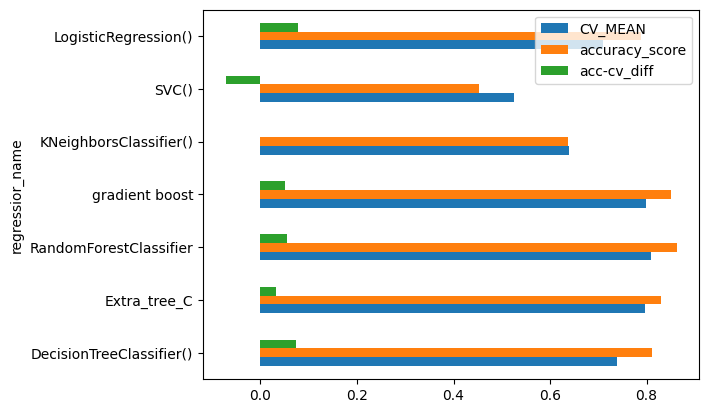

In [43]:
ml_compare=pd.DataFrame()
DT_C={'regressior_name':DTC,'CV_MEAN':cv_mean_dtc,'accuracy_score':acc_dtc,'acc-cv_diff':diff_dtc_score}
ET_C={'regressior_name':'Extra_tree_C','CV_MEAN':cv_mean_etc,'accuracy_score':acc_ETC,'acc-cv_diff':diff_etc_score}
RF_C={'regressior_name':'RandomForestClassifier','CV_MEAN':cv_mean_RF,'accuracy_score':acc_RF,'acc-cv_diff':diff_RF_score}
GB_C={'regressior_name':'gradient boost','CV_MEAN':cv_mean_GB,'accuracy_score':acc_GB,'acc-cv_diff':diff_GB_score}
KNN_C={'regressior_name':KN,'CV_MEAN':cv_mean_KN,'accuracy_score':acc_KN,'acc-cv_diff':diff_KN_score}
SV_C={'regressior_name':SV,'CV_MEAN':cv_mean_SV,'accuracy_score':acc_SV,'acc-cv_diff':diff_SV_score}
LG_C={'regressior_name':LG,'CV_MEAN':cv_mean_LG,'accuracy_score':acc_LG,'acc-cv_diff':diff_LG_score}
ml_compare=ml_compare.append([DT_C,ET_C,RF_C,GB_C,KNN_C,SV_C,LG_C],ignore_index=True)
ml_compare=ml_compare.set_index(['regressior_name'])
ml_compare.plot.barh()
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
p1={'n_estimators':[100],'criterion':['gini','entropy','long_loss'],'random_state':[100,200]}
GCV=GridSearchCV(RandomForestClassifier(),param_grid=p1,cv=5)
final=GCV.fit(x_train,y_train)
print(final.best_params_)

{'criterion': 'gini', 'n_estimators': 100, 'random_state': 100}


In [46]:
final_model=RandomForestClassifier(
criterion= 'gini',n_estimators=100, 
random_state=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.03937007874016


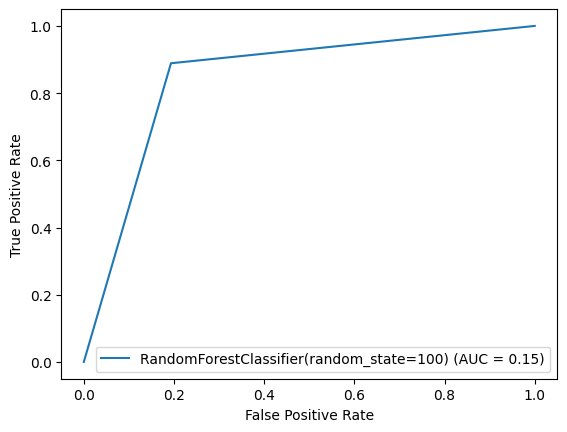

In [47]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(tpr,fpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [48]:
import pickle
file_name='LOAN_ANALYSIS.pkl'
pickle.dump(final_model,open(file_name,'wb'))